# Can we make an EXPRES time series?

Adapted from Joe Llama (joe.llama@lowell.edu) for The Flatiron solar hack day (2023-03-15)

In [1]:
#%pylab notebook
from astropy.io import fits 
import matplotlib.pyplot as plt
import numpy as np
import os
import urllib.request

In [60]:
order = 56
bin1 = 3800
n = 220
indexs = [str(i) for i in range(5065, 5353, 1)]

In [134]:
R = np.zeros((len(indexs), n))
V = np.zeros(len(indexs))
for idx, index in enumerate(indexs):
    filename = f'expres/Sun_220417.{index}.fits'  
    try:
        hdu = fits.open(filename)
        w = hdu[1].data['wavelength'] # Non-excalbiur wavelength solution, NOT barycentric corrected
        s = hdu[1].data['spectrum'] # Non-normalized spectrum 
        e = hdu[1].data['uncertainty'] # Uncertainty
        c = hdu[1].data['continuum'] # Continuum model
        t = hdu[1].data['tellurics'] 
        v = hdu[2].header['HIERARCH wtd_mdpt_bc']
        R[idx, :] = (s[order, bin1:bin1+n] / c[order, bin1:bin1+n]) / t[order, bin1:bin1+n]
        V[idx] = v * 3e8
    except:
        R[idx, :] = np.nan
        print(f'none on {idx}')

none on 12
none on 13
none on 27
none on 28
none on 43
none on 44
none on 59
none on 60
none on 75
none on 76
none on 92
none on 93
none on 108
none on 109
none on 123
none on 124
none on 136
none on 137
none on 150
none on 151
none on 169
none on 170
none on 188
none on 189
none on 207
none on 208
none on 226
none on 227
none on 244
none on 245
none on 262
none on 263
none on 279
none on 280


[]

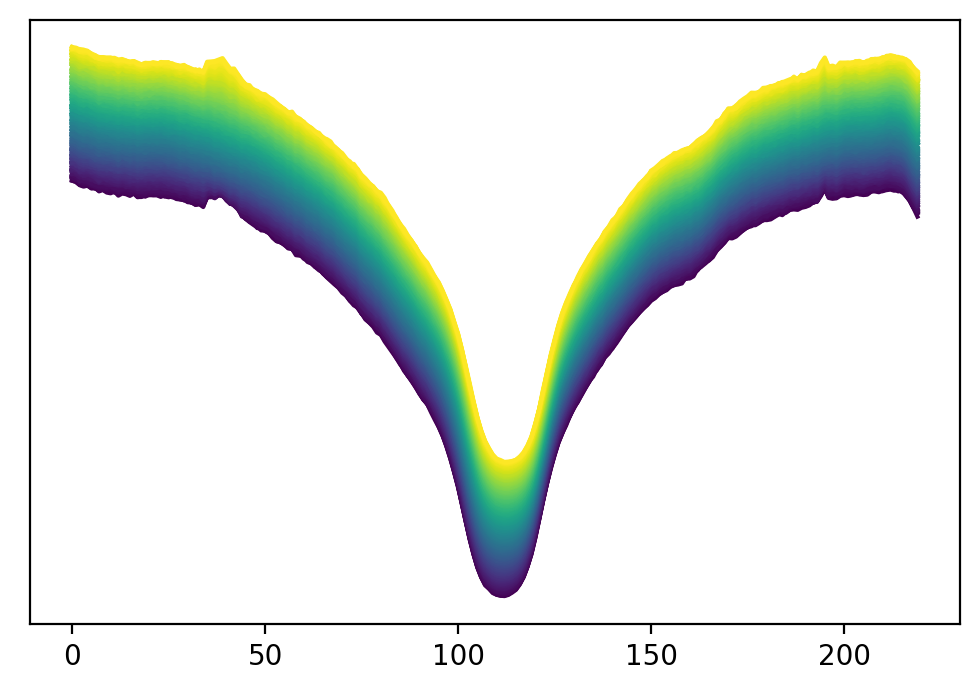

In [135]:
fig, ax = plt.subplots(dpi=200)

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,len(indexs))))

for i in range(len(indexs)):
    ax.plot(20*R[i] + i/50)
ax.set_yticks([])

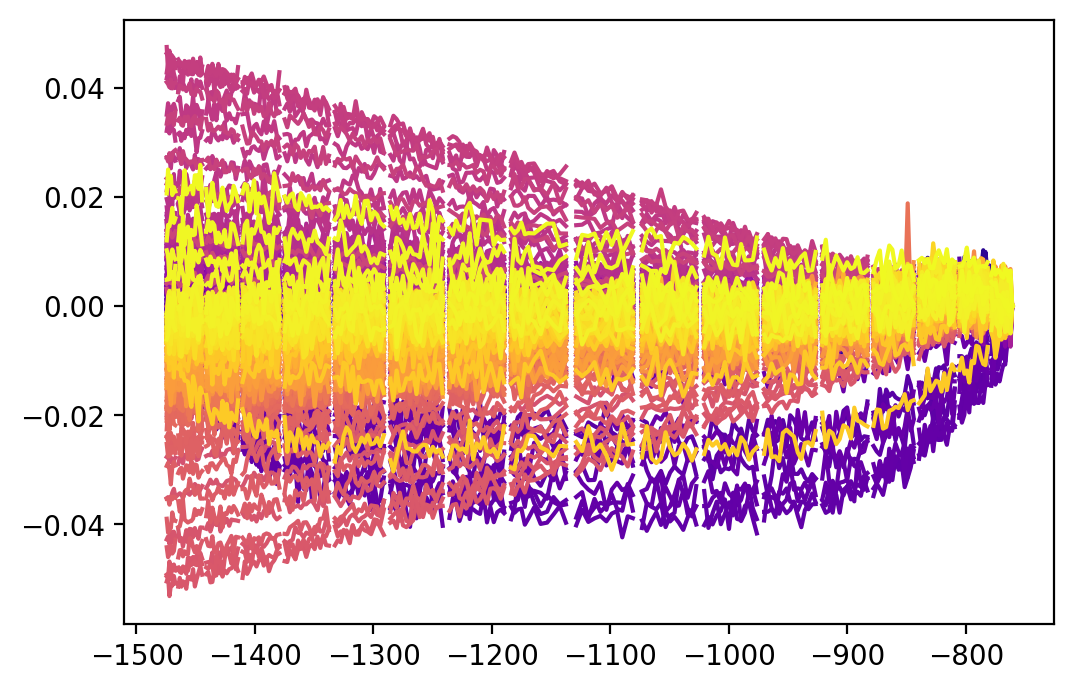

In [136]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.plasma(np.linspace(0,1,n)))
fig, ax = plt.subplots(dpi=200)
for i in range(n):
    ax.plot(V, R[:, i] - R[0, i])

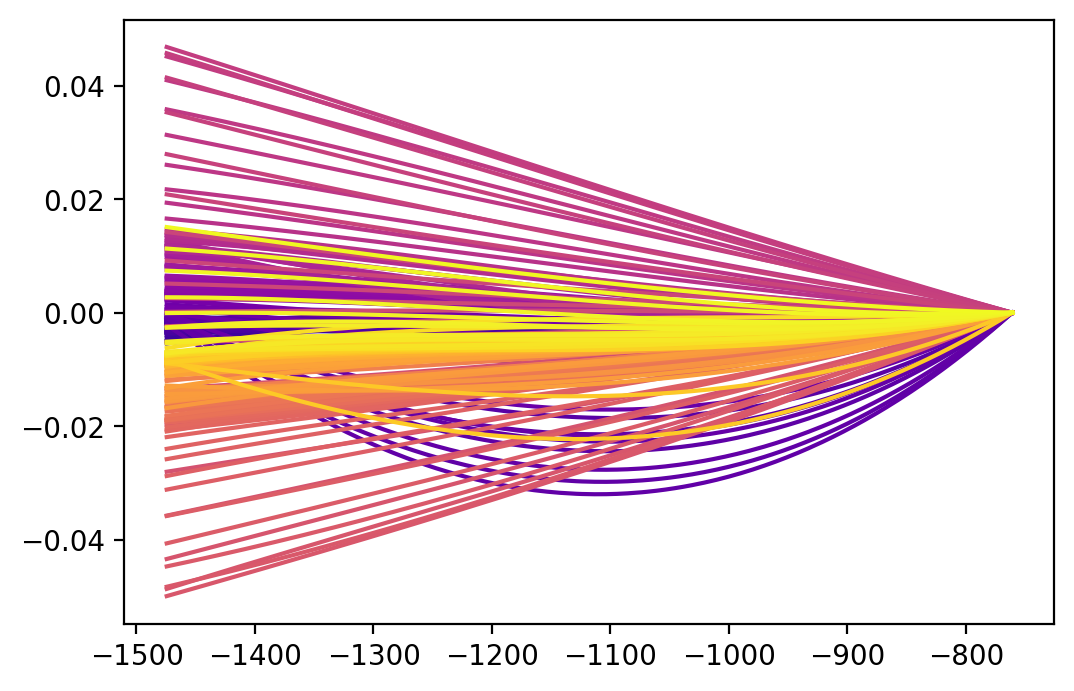

In [137]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.plasma(np.linspace(0,1,n)))
fig, ax = plt.subplots(dpi=200)
for i in range(n):
    v_1 = V[~np.isnan(R[:, i])]
    r_1 = R[~np.isnan(R[:, i]), i]
    p0 = np.polyfit(v_1, r_1, 3)
    np.poly1d(p0)
    ax.plot(v_1, np.poly1d(p0)(v_1) - np.poly1d(p0)(v_1)[0])

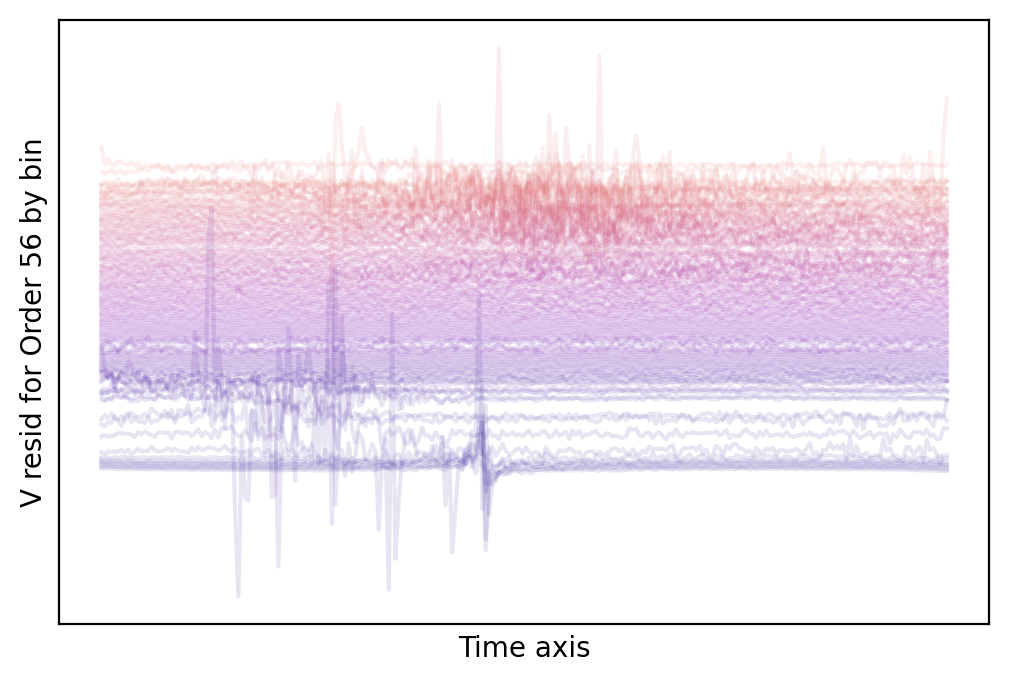

In [153]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.plasma(np.linspace(0,1,n)))
fig, ax = plt.subplots(dpi=200)
for i in range(n):
    v_1 = V[~np.isnan(R[:, i])]
    r_1 = R[~np.isnan(R[:, i]), i]
    p0 = np.polyfit(v_1, r_1, 3)
    p0i = p0[::-1]
    cal = np.sum([j * p0i[j] * v_1**(j-1)for j in range(len(p0))], axis=0)
    resid_v = (r_1 - np.poly1d(p0)(v_1)) / cal
    std = np.std(resid_v)
    if std < 1000:
        ax.plot(resid_v + i*100, alpha=0.1)
#ax.set_ylim([-10000, 10000])
ax.set_yticks([])
ax.set_xticks([])
ax.set_ylabel(f'V resid for Order {order} by bin')
ax.set_xlabel('Time axis')
fig.savefig('many_timeseries_fig.png')

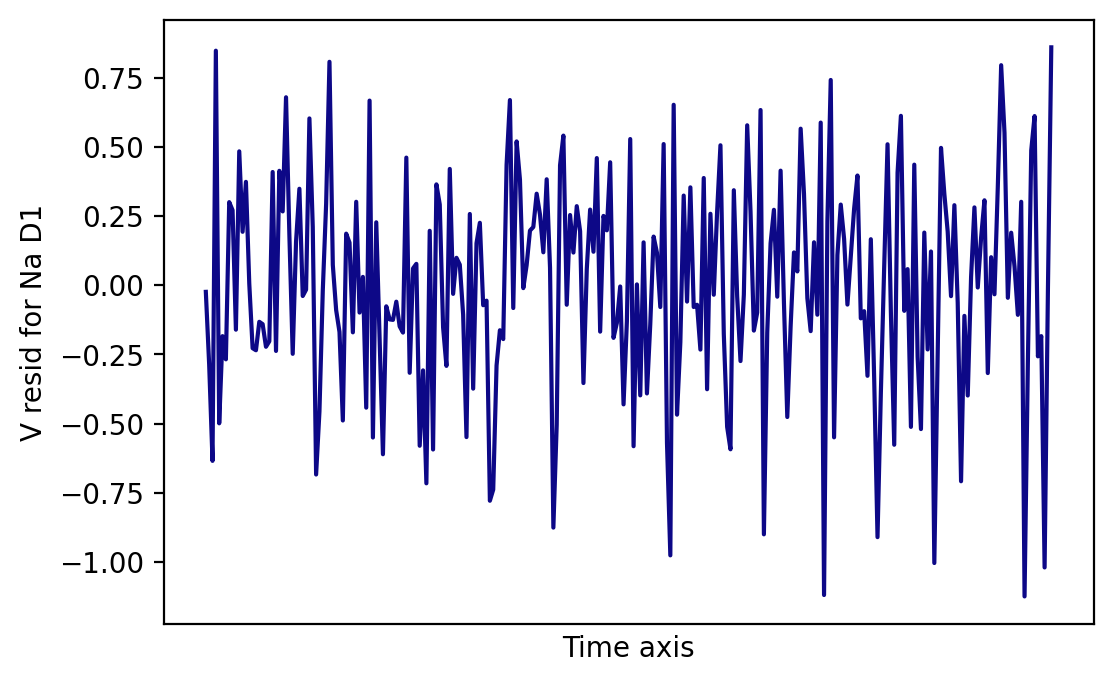

In [159]:
resid_vs = np.zeros([254, len(indexs)])
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.plasma(np.linspace(0,1,n)))
fig, ax = plt.subplots(dpi=200)
for i in range(n):
    v_1 = V[~np.isnan(R[:, i])]
    r_1 = R[~np.isnan(R[:, i]), i]
    p0 = np.polyfit(v_1, r_1, 4)
    p0i = p0[::-1]
    cal = np.sum([j * p0i[j] * v_1**(j-1)for j in range(len(p0))], axis=0)
    resid_v = (r_1 - np.poly1d(p0)(v_1)) / cal
    std = np.std(resid_v)
    if std < 40:
        resid_vs[:, i] = resid_v
        #ax.plot(v_1, resid_v, alpha=0.1)
ax.plot(np.mean(resid_vs, axis=1))

#ax.set_yticks([])
ax.set_xticks([])
ax.set_ylabel(f'V resid for Na D1')
ax.set_xlabel('Time axis')
fig.savefig('one_timeseries_fig.png')